In [155]:
import pandas as pd
import numpy as np

#For visualising the screeplot
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

from scipy.linalg import svd

In [156]:
country_df = pd.read_csv('./Country-data.csv')
print(country_df.head())
print(country_df.shape)
print(country_df.info())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income  

In [157]:
# Perform EDA 

#2. Clean the data

# Let's drop Country since it has no significance to keep later on 
#will merge this column to the dataframe
#country_df = country_df.drop('country', axis=1)
print(country_df.shape)
print(country_df.info())
print(country_df.head())

(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   g

In [158]:
# Missing Values 
#country_df.isnull() # REturns true and False 
# For data cleaning 
print(country_df.isna().sum())
#There is no missing values found

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [159]:
# column format conversion % to required form 
country_df['exports']=(country_df['exports']*country_df['gdpp'])/100
country_df['health']=(country_df['health']*country_df['gdpp'])/100
country_df['imports']=(country_df['imports']*country_df['gdpp'])/100
print(country_df.head())
country_df_without_country = country_df.drop('country', axis=1)
print(country_df_without_country.head())
print(country_df_without_country.info())

               country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
   child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   129

In [160]:
# Analysis Part 
#1. PCA
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_df2 = standard_scaler.fit_transform(country_df_without_country)
print(country_df2)

[[ 1.29153238 -0.4110113  -0.56503989 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.35019096 -0.43921769 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.31852577 -0.48482608 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541 -0.36146329 -0.53848844 ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.39216643 -0.55059641 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.38395214 -0.54049845 ... -2.09278484  1.6246091
  -0.62954556]]


In [161]:
#Let's import the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

#Performing the PCA
pca.fit(country_df2)
#List of PCA components.
print(pca.components_)

[[-0.31639186  0.34288671  0.358535    0.34486492  0.38004113 -0.14308531
   0.34385651 -0.30284224  0.39998795]
 [ 0.47626735  0.39731091  0.1550529   0.37078075  0.12838448  0.22126089
  -0.36981973  0.4597152   0.2006241 ]
 [-0.15001225 -0.03057367 -0.07570322 -0.07217386  0.14576421  0.94841868
   0.19675173 -0.07783431  0.01033941]
 [-0.14805195  0.44942527 -0.59971228  0.46179779 -0.15480592 -0.00762798
  -0.01839465 -0.21392805 -0.36477239]
 [ 0.1019948  -0.03853829 -0.49319984 -0.2527867   0.79407469 -0.13642345
  -0.15404105 -0.02033568  0.08750149]
 [ 0.19658519 -0.03891112  0.18069888 -0.01217988 -0.03814681  0.10840284
  -0.58600986 -0.75390075  0.04538167]
 [ 0.76126725 -0.01366973 -0.06461567  0.02718244 -0.02311312 -0.02207663
   0.58120846 -0.27314534 -0.04402264]
 [ 0.00644411 -0.05526371  0.43007213  0.1311355   0.3938113  -0.00607016
   0.002966    0.03429334 -0.79902242]
 [-0.00495137 -0.71792388 -0.13034593  0.66568664  0.07901102  0.01128137
  -0.03159406  0.02368

In [162]:
#Property 2: Principal Components are perpendicular to each other
#For verifying this we would be calculating the dot product of any of the two PCs.
#We know that dot product of any 2 perpendicular vectors is 0.
print("Check that the principal components are perpendicular to each other or not")
print(round(np.dot(pca.components_[0],pca.components_[1])))
print(round(np.dot(pca.components_[1],pca.components_[2])))

#Let's check the variance ratios
#Property 3). Principal Components capture maximum variance and are ordered
print("Exaplined Variance Ratio ")
##First let us see what is the variance given by the PCs
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.round(2))

Check that the principal components are perpendicular to each other or not
0.0
-0.0
Exaplined Variance Ratio 
[5.89372984e-01 1.84451685e-01 9.91147170e-02 6.07227801e-02
 3.02917253e-02 2.45982702e-02 9.39743701e-03 1.55641971e-03
 4.93981394e-04]
[0.59 0.18 0.1  0.06 0.03 0.02 0.01 0.   0.  ]


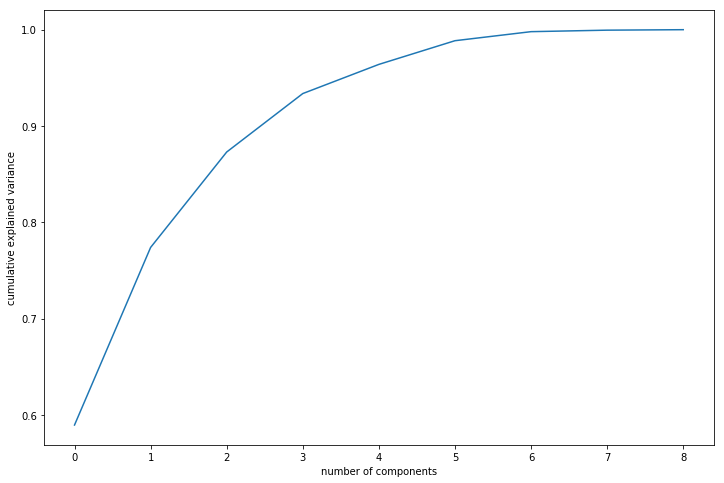

In [163]:
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
##Around 87% of the information is being explained by 3 components

In [164]:
#Understanding how the original variables are loaded on the principal components. It can be verified from above as well.
colnames = list(country_df_without_country.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
print(pcs_df)

      Feature       PC1       PC2       PC3
0  child_mort -0.316392  0.476267 -0.150012
1     exports  0.342887  0.397311 -0.030574
2      health  0.358535  0.155053 -0.075703
3     imports  0.344865  0.370781 -0.072174
4      income  0.380041  0.128384  0.145764
5   inflation -0.143085  0.221261  0.948419
6  life_expec  0.343857 -0.369820  0.196752
7   total_fer -0.302842  0.459715 -0.077834
8        gdpp  0.399988  0.200624  0.010339


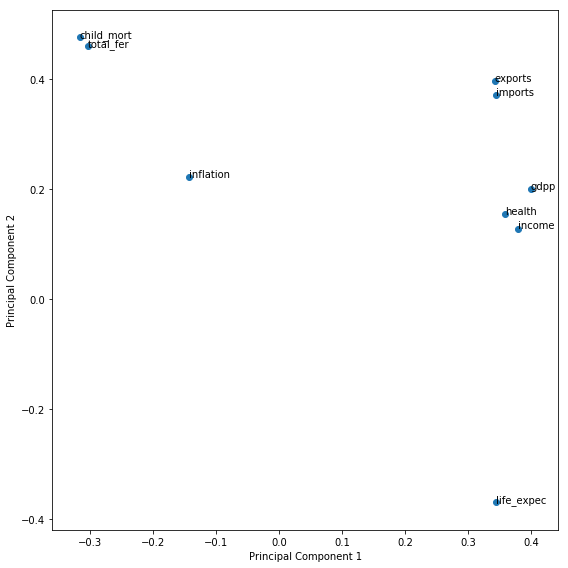

In [165]:
# Let's plot them to visualise how these features are loaded
#%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
#plt.scatter(pcs_df.PC1, pcs_df.PC2,pcs_df.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.zlabel('Principal Component 3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
    #plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]),pcs_df.PC3[i])
plt.tight_layout()
plt.show()
# We have only plotted 2 PCs because it represents maximum variance, though we are considering 3 PC's

In [166]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)
df_pca = pca_final.fit_transform(country_df2)
print(df_pca.shape)
print(df_pca)

(167, 3)
[[-2.63744157e+00  1.46903797e+00 -5.41359106e-01]
 [-2.22769569e-02 -1.43189586e+00 -2.07009539e-02]
 [-4.57626261e-01 -6.73300938e-01  9.61867281e-01]
 [-2.72452030e+00  2.17458267e+00  6.06686548e-01]
 [ 6.49848516e-01 -1.02437392e+00 -2.50102847e-01]
 [ 3.71968554e-02 -6.80889086e-01  1.46696276e+00]
 [-3.32691520e-01 -1.27451685e+00  1.76636110e-01]
 [ 3.18036154e+00 -2.50784878e-01 -1.16877257e-01]
 [ 3.81568156e+00  2.56083499e-01 -2.70495294e-01]
 [-4.67515152e-01 -4.93492360e-01  6.03288028e-01]
 [ 1.49875246e+00 -4.28907400e-01 -5.50237572e-01]
 [ 1.47097104e+00 -3.26795693e-01  4.28411771e-01]
 [-1.01419903e+00 -7.11807758e-01 -1.16988551e-01]
 [ 8.45238116e-01 -1.00860625e+00 -4.17261615e-01]
 [-1.34473920e-02 -9.82186148e-01  8.80913018e-01]
 [ 3.96087770e+00  8.38740841e-01 -2.94077196e-01]
 [-4.02707071e-01 -9.21816189e-01 -5.04892363e-01]
 [-2.36598657e+00  1.16845951e+00 -1.23525716e+00]
 [-7.14998191e-01 -7.68107039e-01 -1.34109127e-01]
 [-1.01778054e+00 -4.2

In [168]:

#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
print(pcs_df2.head())

        PC1       PC2       PC3
0 -2.637442  1.469038 -0.541359
1 -0.022277 -1.431896 -0.020701
2 -0.457626 -0.673301  0.961867
3 -2.724520  2.174583  0.606687
4  0.649849 -1.024374 -0.250103


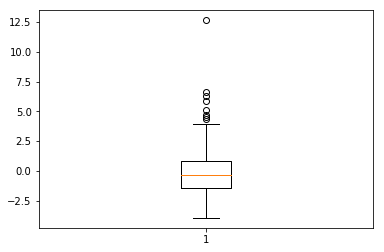

In [169]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
# Box plot for PC1
# For PC1
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]
#print(pcs_df2)

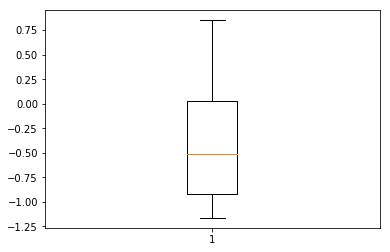

In [173]:
# For PC2
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

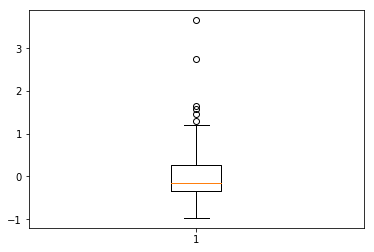

In [174]:
# For PC3
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [175]:
print(pcs_df2.shape)

(85, 3)


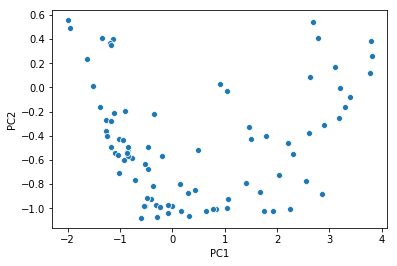

In [227]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
#hue='ClusterID',legend='full',data=dat_km

In [232]:
#sns.scatterplot(x='PC2',y='PC3',data=pcs_df2)
#print(pca.components_)
#print(pcs_df.Feature)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


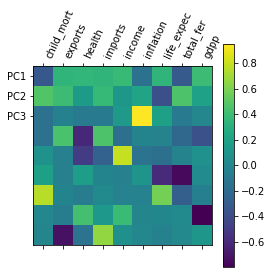

(9, 4)


In [234]:
# Heat plot to see how features are mixed up with the principal components 
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['PC1','PC2','PC3'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(pcs_df.Feature)),pcs_df.Feature,rotation=65,ha='left')
plt.tight_layout()
plt.show()
print(pcs_df.shape)

In [180]:
##Let's go ahead and begin with the clustering process
# Clustering 
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [181]:
#Let's check the Hopkins measure
hopkins(pcs_df2)
#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

0.7196895505652647

In [182]:
dat3_1 = pcs_df2

In [228]:
#  K- means Clustering

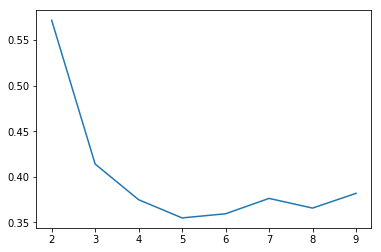

In [183]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [58]:
## From the above silhouette analysis we can see that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method

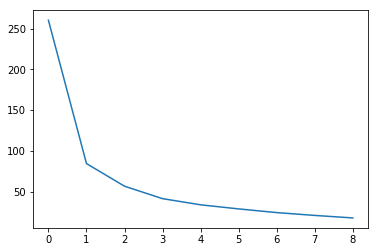

In [184]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [188]:
#if we can see here also a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [189]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','ClusterID']
dat_km

,PC1,PC2,PC3,ClusterID
0,-0.457626,-0.673301,0.961867,1
1,0.649849,-1.024374,-0.250103,1
2,3.180362,-0.250785,-0.116877,0
3,3.815682,0.256083,-0.270495,0
4,-0.467515,-0.493492,0.603288,1
5,1.498752,-0.428907,-0.550238,0
6,1.470971,-0.326796,0.428412,0
7,-1.014199,-0.711808,-0.116989,1
8,0.845238,-1.008606,-0.417262,1
9,-0.013447,-0.982186,0.880913,1


In [190]:
dat_km['ClusterID'].value_counts()

1    55
0    30
Name: ClusterID, dtype: int64

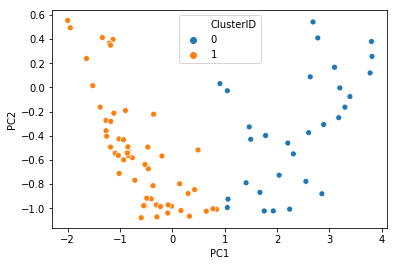

In [191]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [193]:
# Here in above graph we can easily see the 2 clusters 
#sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full',data=dat_km)

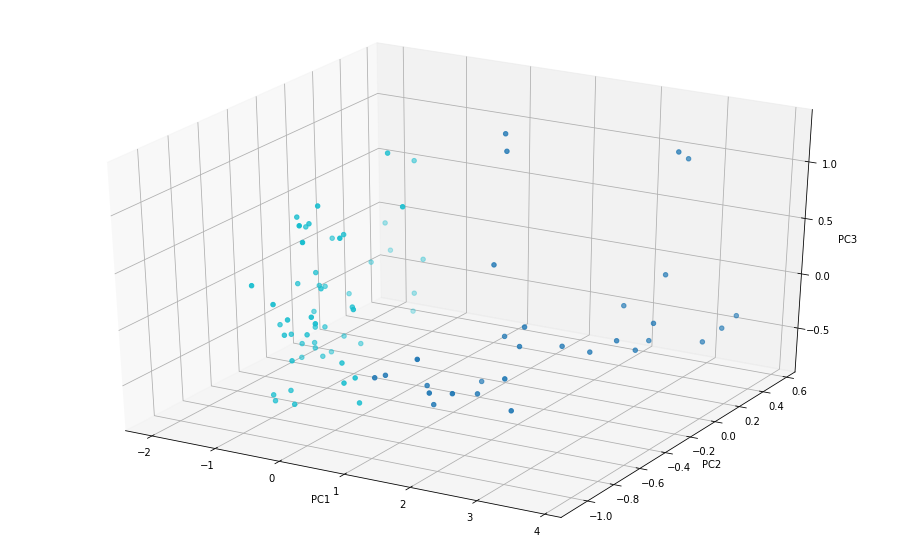

In [194]:
# Let us visualize in a 3d plot
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dat_km.loc[:,:]['PC1'],
    ys=dat_km.loc[:,:]['PC2'],
    zs=dat_km.loc[:,:]['PC3'],
    c=dat_km.loc[:,:]['ClusterID'], 
    cmap='tab10'
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [195]:
# Its time to merge original dataset, since we need to do clustering on the basis of country name
dat5=pd.merge(country_df,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-0.457626,-0.673301,0.961867,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0.649849,-1.024374,-0.250103,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,3.180362,-0.250785,-0.116877,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3.815682,0.256083,-0.270495,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,-0.467515,-0.493492,0.603288,1


In [196]:
# Now, let us drop the PC1, PC2 and PC3 
dat6=dat5.drop(['PC1','PC2','PC3'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [81]:
# We have performed the clustering using PCAs and now we allocated the cluster for each data points

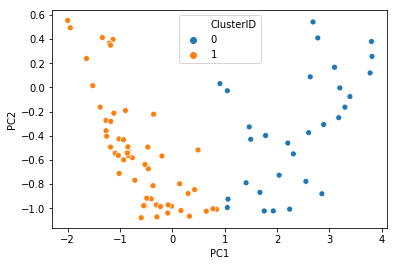

In [226]:
#plotting a scatter plot of all the countries and differentiating the clusters
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat5)

In [215]:
# sort the countries based on ClusterID
dat6_cluster_sort = dat6.sort_values('ClusterID')
dat6_cluster_sort.head()
dat6_cluster_sort['ClusterID'].value_counts()
# 55 countries are present in the cluster 1
# 30 countries are present in the cluster 0 

1    55
0    30
Name: ClusterID, dtype: int64

In [202]:
#Analysis of the clusters
#clu_country = 	pd.DataFrame(dat6.groupby(["ClusterID"]).country.mean())
clu_child_mort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [203]:
df = pd.concat([pd.Series([0,1]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)
df

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,43.040000,3496.157873,723.518917,3517.132267,12522.133333,7.695933,69.313333,2.905667,8834.533333
1,1,39.276364,7016.515415,1225.569738,6231.219255,18506.672727,6.475000,70.972727,2.988909,14684.345455


In [204]:
df.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,43.040000,3496.157873,723.518917,3517.132267,12522.133333,7.695933,69.313333,2.905667,8834.533333
1,1,39.276364,7016.515415,1225.569738,6231.219255,18506.672727,6.475000,70.972727,2.988909,14684.345455


In [216]:
# By looking at the mean values we can clearly say that the cluster 1 are having more income and gdpp and 
# the most healthiest countries, and less child_mort.
#sns.scatterplot(x='country',y='ClusterID',hue='ClusterID',data=dat6)

In [ ]:
#Lets Analyse clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries

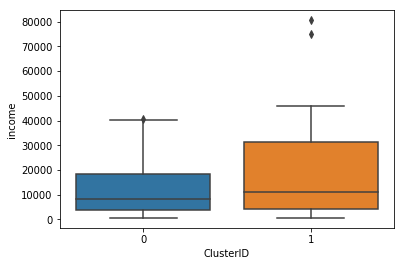

In [217]:
# Let us analyze income variable using a box plot
sns.boxplot(x='ClusterID',y='income', data=dat6)

In [ ]:
# Here we can see that cluster 1 contains high income of countries

In [218]:
#sns.scatterplot(x='income',y='child_mort',hue='ClusterID',legend='full',data=dat6)

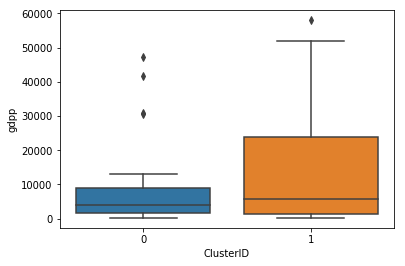

In [219]:
# Let us analyze gdpp variable using a box plot
sns.boxplot(x='ClusterID',y='gdpp', data=dat6)

In [ ]:
# once again we can see that cluster 1 countries having higher gdpp as compared to cluster 0

In [220]:
#sns.scatterplot(x='child_mort',y='gdpp',data=dat6)
#sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=dat6)

In [221]:
#sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=dat6)

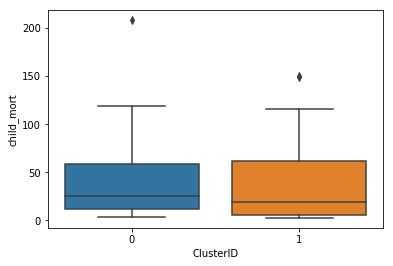

In [222]:
# Let us analyze gdpp variable using a box plot
sns.boxplot(x='ClusterID',y='child_mort', data=dat6)

In [ ]:
#Here we can see that child_mort for cluster 0 is higher than the cluster 1. 

In [223]:
#Let's use the concept of binning
fin=dat6[dat6['income']<=18506.67]
fin=fin[fin['gdpp']<= 14684.34]
fin=fin[fin['child_mort']> 39.27]

#We are listing minimum 5 countries which are in direst need of aid using k-Means clustering analysis 
fin.nsmallest(5,'gdpp')
#fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,1
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,1


In [229]:
# Now, Let us start with Hierarchical Clustering

In [235]:
dat4_1 = pcs_df2

        PC1       PC2       PC3
0 -0.457626 -0.673301  0.961867
1  0.649849 -1.024374 -0.250103
2  3.180362 -0.250785 -0.116877
3  3.815682  0.256083 -0.270495
4 -0.467515 -0.493492  0.603288


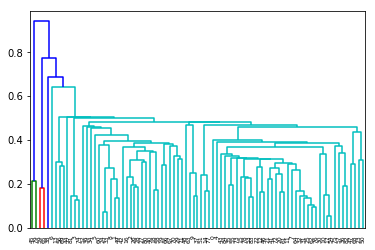

In [236]:
print(dat4_1.head())

#Single linkage
mergings = linkage(dat4_1, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

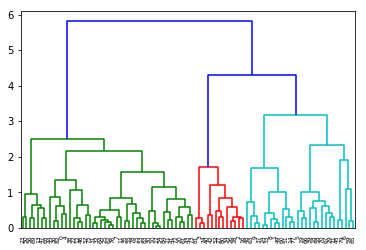

In [237]:
# Complete Linkage 
mergings = linkage(dat4_1, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [239]:
# Here you can see 3 different colors 
# so, let us choose number of clusters =3 
cut_tree(mergings, n_clusters=3)
cut_tree(mergings, n_clusters=3).shape # It is one dimesional array a tyoe of (85,1)

(85, 1)

In [241]:
# let us reshape it 
cluster_ID= cut_tree(mergings, n_clusters=3).reshape(-1, )

In [242]:
#assign cluster labels 
dat6['ClusterID']=cluster_ID
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


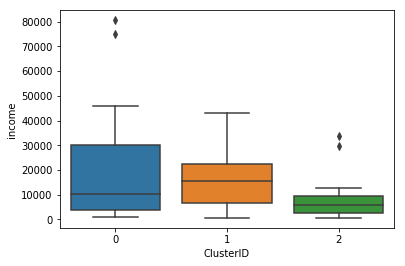

In [243]:
# Let us analyze income variable using a box plot
sns.boxplot(x='ClusterID',y='income', data=dat6)

In [244]:
# Here we can see 3 Clusters and the overall range of income in cluster 0 are more than the others but the median 
# of cluster 1 are higher than the others.   

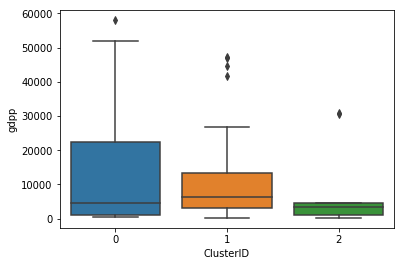

In [245]:
# Let us analyze gdpp variable using a box plot
sns.boxplot(x='ClusterID',y='gdpp', data=dat6)

In [246]:
# Here as we can see the overall range of gdpp for cluster 0 countries are higher than the other clusters 
# but the median of cluster 1 are higher than the others

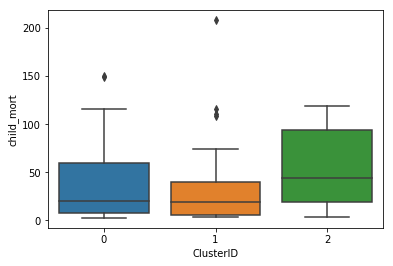

In [247]:
# Let us analyze gdpp variable using a box plot
sns.boxplot(x='ClusterID',y='child_mort', data=dat6)

In [248]:
# Here, the box plot says the overall range for the child_mort are higher in countries belongs to cluster 2,
# followed by cluster 0 and cluster 1. Along, median for child_mort for cluster 2 is also higher as compared to others. 

In [249]:
# Now again, let us analyse the more 

In [250]:
# sort the countries based on ClusterID
dat6_cluster_sort = dat6.sort_values('ClusterID')
dat6_cluster_sort.head()
dat6_cluster_sort['ClusterID'].value_counts()
# 44 countries are present in the cluster 0
# 28 countries are present in the cluster 1 
# 13 countries are present in the cluster 2 

0    44
1    28
2    13
Name: ClusterID, dtype: int64

In [251]:
# Let us grouby based on the clusteID
#clu_country = 	pd.DataFrame(dat6.groupby(["ClusterID"]).country.mean())
clu_child_mort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [252]:
df2 = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)
df2

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,39.268182,7159.969995,1190.740473,6294.580659,18239.500000,5.838614,70.852273,3.044091,14493.340909
1,1,36.735714,4931.564429,1114.547393,4705.830500,16824.607143,8.899429,71.260714,2.479286,12393.714286
2,2,53.461538,2897.738477,423.999638,3038.940308,9223.384615,6.224615,66.930769,3.707692,6764.923077


In [253]:
df2.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df2

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,39.268182,7159.969995,1190.740473,6294.580659,18239.500000,5.838614,70.852273,3.044091,14493.340909
1,1,36.735714,4931.564429,1114.547393,4705.830500,16824.607143,8.899429,71.260714,2.479286,12393.714286
2,2,53.461538,2897.738477,423.999638,3038.940308,9223.384615,6.224615,66.930769,3.707692,6764.923077


In [256]:
#Let's use the concept of binning
fin2=dat6[dat6['income']<=16824.60]
fin2=fin2[fin2['gdpp']<= 12393.71]
fin2=fin2[fin2['child_mort']> 53.46]

#We are listing minimum 5 countries which are in direst need of aid using Hierarchical clustering analysis 
fin2.nsmallest(5,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,0
